In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

#### This notebook implements gradient descent alogrithms on linear regression problems using numpy

In [2]:
#implement gradient descent algorithm
def timeit(func):
    """decorator function for timing running time
    """
    def wrapper(*args, **kwargs):
        time_start = time.time()
        result = func(*args, **kwargs)
        time_end = time.time()
        print("Elapsed time: %s" %(time_end - time_start))
        return result
    return wrapper

@timeit
def gd_linreg(x, y, alpha, t0_start, t1_start, iteration=10000):
    m = len(x) # size of training sets
    i = 1 # initiate iteration counter
    t0 = t0_start # starting intercept
    t1 = t1_start # starting slope
    j0 = [1/float(2*m)*np.sum(np.square(t1*x + t0 - y))]  # starting cost function

    while i < iteration:
        t0_p = t0
        t1_p = t1

        t0 = t0_p - alpha/float(m)*np.sum(np.square(t1_p*x+t0_p-y)) # gradient descent for intercept
        t1 = t1_p - alpha/float(m)*np.sum(np.square((t1_p*x+t0_p-y)*x)) # gradient descent for slope

        j0.append(1/float(2*m)*np.sum(np.square(t1*x + t0 - y)))
        i += 1
    print("total iterations: %s" %i)
    return (t0, t1, j0)

In [3]:
df = pd.read_excel('linregress.xls')
x = df['X']
y = df['Y']
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


In [4]:
# running the algorithms by iterating 20000 times
(t0, t1, j0) = gd_linreg(x=x, y=y, alpha=1e-7, t0_start=1, t1_start=1, iteration=20000)

total iterations: 20000
Elapsed time: 22.3830001354


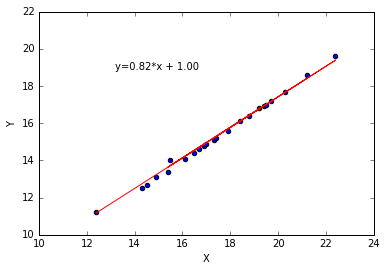

In [5]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, t1*x+t0, 'r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.text(x=0.3, y=0.7, s='y=%.2f*x + %.2f' %(t1, t0))


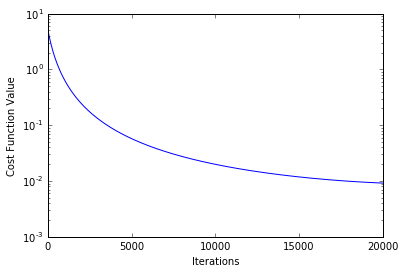

In [6]:
# cost function
fig, ax = plt.subplots()
ax.plot(j0)
ax.set_yscale('log')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Function Value')


total iterations: 10
Elapsed time: 0.0090000629425
total iterations: 100
Elapsed time: 0.0970001220703
total iterations: 1000
Elapsed time: 1.02199983597
total iterations: 10000
Elapsed time: 11.0750000477


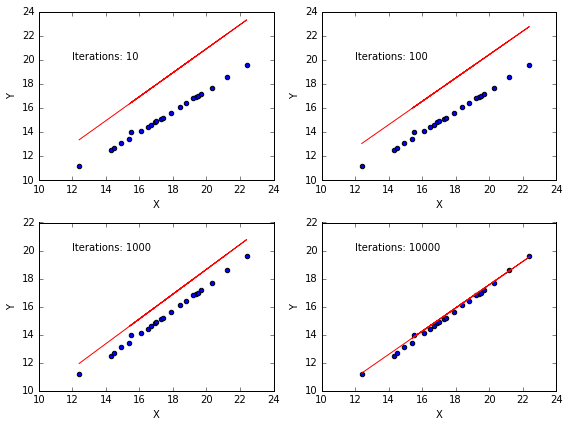

In [8]:
# converging process
fig, ax = plt.subplots(2, 2, squeeze=False, figsize=(8,6))
ax = ax.reshape(4,1)
iteration = 10
for i in range(4):
    result = gd_linreg(x=x, y=y, alpha=1e-7, t0_start=1, t1_start=1, iteration=iteration)
    ax[i][0].plot(x, result[1]*x+result[0], 'r')
    ax[i][0].scatter(x, y)
    ax[i][0].set_xlabel('X')
    ax[i][0].set_ylabel('Y')
#     ax[i][0].text(x=0.3, y=0.7, s='y=%.2f*x + %.2f' %(result[1], result[0]))
    ax[i][0].annotate('Iterations: %s' %iteration, xy=(12, 20))
    iteration *= 10
fig.tight_layout()
